**What is H2O?**<br/>
H2O is a Java-software for data modeling anf general computing. There are many different perceptions of the H2O software, but the primary purpose of H2O is ad a distributed, parallel, in memory processing engine.
<br/>

**H2O - Key Features**<br/>

Some of the key features of H2O are :
- Access from R and Python
- Acess from web based interface called Flow. By means of Flow, data scientist are able to import, export and modify the datasets, play with the models, verify model performance and much more.
- AutoML : Automatic training and tuning of many models within a user specified time limit
- Distributed, In-memory processing : In-memory processing with fast serialization between nodes and clusters to support massive datasets.
- Simple Deployment

In [1]:
import h2o
import time
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

Once the module in imported, the first step is to initialize the h2o module.

The h2o.init() command is pretty smart and does a lot of things. First, an attempt is made to search for an existing H2O instance being started already, before starting a new one. When none is found automatically or specified manually with argument available, a new instance of H2O is started.

During startup, H2O is going to print some useful information. Version of the Python it is running on, H2O’s version, how to connect to H2O’s Flow interface or where error logs reside, just to name a few.

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_181"; Java(TM) SE Runtime Environment (build 1.8.0_181-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /home/mayank/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwpj5u6lv
  JVM stdout: /tmp/tmpwpj5u6lv/h2o_mayank_started_from_python.out
  JVM stderr: /tmp/tmpwpj5u6lv/h2o_mayank_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,2 months and 20 days
H2O cluster name:,H2O_from_python_mayank_jqbcb9
H2O cluster total nodes:,1
H2O cluster free memory:,3.455 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


**Data Exploration**

Now the initialization is done, let us first import the dataset. The command is very similiar to pandas.read_csv and the data is stored in memory in a data structure called H2OFrame.

H2O support varies file format and data sources.

In [3]:
diabetes_df = h2o.import_file('./pima-indians-diabetes-database/diabetes.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
diabetes_df.show(rows = 5)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1


In [5]:
diabetes_df.describe()

Rows:768
Cols:9




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


describe() gives out a lot of information.

- Number of rows and columns in the dataset
- A number of summary statistics about the dataset such as
- Data type of the column such as integer, categorical etc
- Minimum value
- Mean value
- Maximum value
- Standard deviation value
- Number of zeros in the column
- Number of missing values in the column
- A look at the top few rows


Now let us look at the distribution of the individual features using hist() command

/home/mayank/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


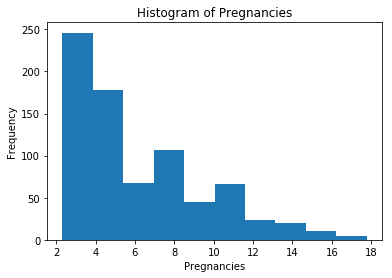

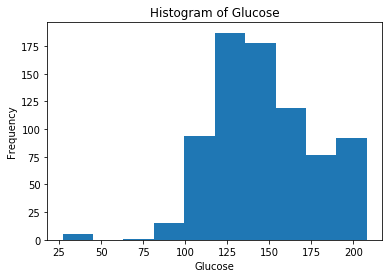

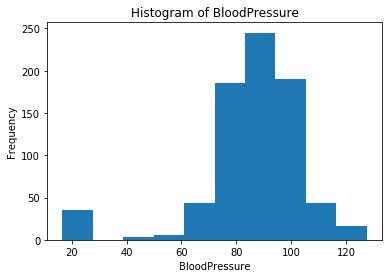

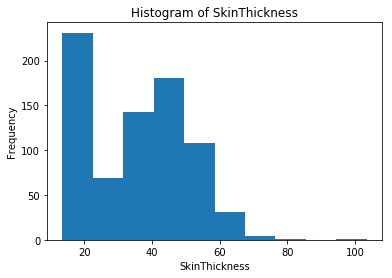

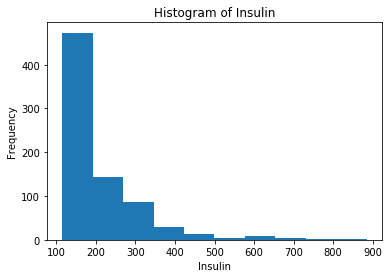

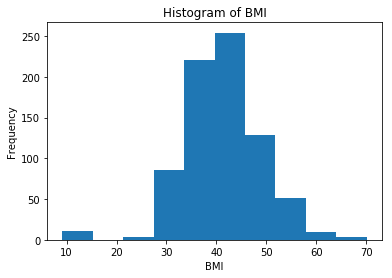

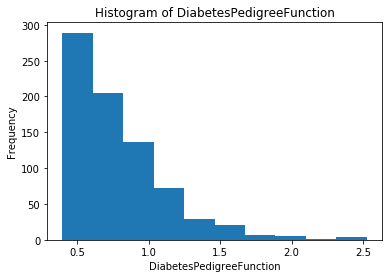

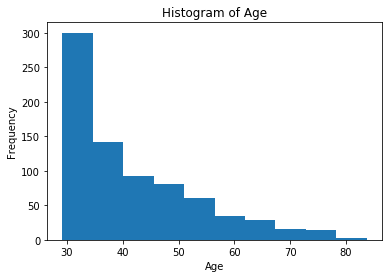

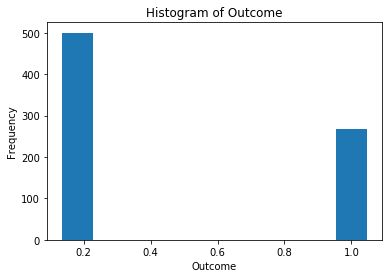

In [6]:
for col in diabetes_df.columns:
    diabetes_df[col].hist()

Now let us also look at the correlation of the individual features. We can use the cor() function in H2OFrame for the same.

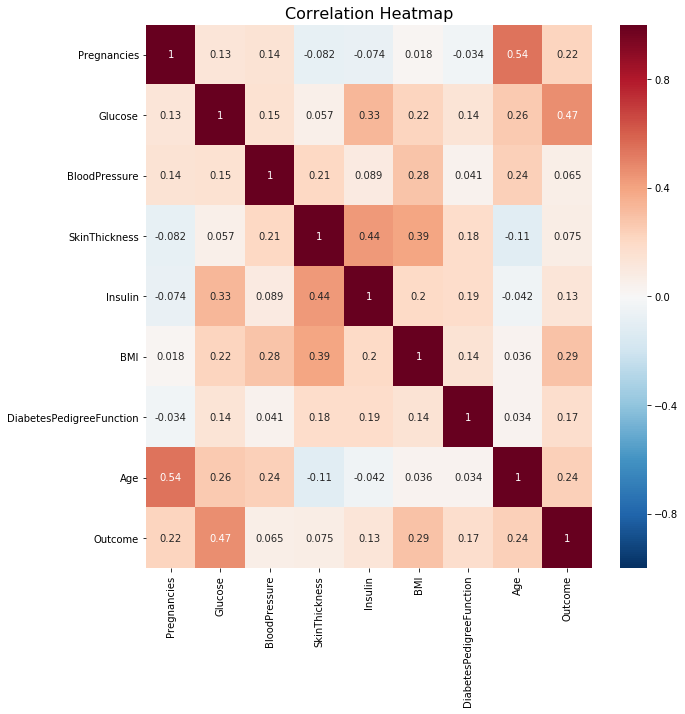

In [7]:
plt.figure(figsize = (10, 10))
corr = diabetes_df.cor().as_data_frame()
corr.index = diabetes_df.columns

sns.heatmap(data = corr, annot = True, cmap='RdBu_r', vmax = 1, vmin = -1)

plt.title('Correlation Heatmap', fontsize = 16)
plt.show()

Let us now split the data into three parts - train, valid and test datasets - at a ratio of 60%, 20% and 20% respectively. We could use `split_frame()` function for the same.

In [8]:
train, val, test = diabetes_df.split_frame(ratios = [0.6, 0.2], seed = 100)

response = "Outcome"

In [9]:
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()
val[response] = val[response].asfactor()

print('-'*100)
print('Number of Rows in Train : {}, Test : {} and Valid : {}'.format(train.shape[0], test.shape[0], val.shape[0]))

----------------------------------------------------------------------------------------------------
Number of Rows in Train : 459, Test : 166 and Valid : 143


**Modeling and Model Training**

Now let us built a basline model using these three splits.

In [10]:
feature_variables = diabetes_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x = feature_variables, y = response, training_frame = train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [11]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1534163112715_1


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.045362673251920275
RMSE: 0.21298514796088547
LogLoss: 0.19003856764530652
Mean Per-Class Error: 0.029322162985529365
AUC: 0.9959274773631209
Gini: 0.9918549547262419
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39428446288510066: 


,0,1,Error,Rate
0,293.0,10.0,0.033,(10.0/303.0)
1,4.0,152.0,0.0256,(4.0/156.0)
Total,297.0,162.0,0.0305,(14.0/459.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3942845,0.9559748,153.0
max f2,0.3362619,0.9675406,167.0
max f0point5,0.5265908,0.9737569,134.0
max accuracy,0.3942845,0.9694989,153.0
max precision,0.9704768,1.0,0.0
max recall,0.2535496,1.0,186.0
max specificity,0.9704768,1.0,0.0
max absolute_mcc,0.3942845,0.9330429,153.0
max min_per_class_accuracy,0.4253254,0.9669967,152.0
max mean_per_class_accuracy,0.3942845,0.9706778,153.0


Gains/Lift Table: Avg response rate: 33.99 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0108932,0.9567279,2.9423077,2.9423077,1.0,1.0,0.0320513,0.0320513,194.2307692,194.2307692
,2,0.0217865,0.9504769,2.9423077,2.9423077,1.0,1.0,0.0320513,0.0641026,194.2307692,194.2307692
,3,0.0305011,0.9392770,2.9423077,2.9423077,1.0,1.0,0.0256410,0.0897436,194.2307692,194.2307692
,4,0.0413943,0.9289064,2.9423077,2.9423077,1.0,1.0,0.0320513,0.1217949,194.2307692,194.2307692
,5,0.0501089,0.9199767,2.9423077,2.9423077,1.0,1.0,0.0256410,0.1474359,194.2307692,194.2307692
,6,0.1002179,0.8906729,2.9423077,2.9423077,1.0,1.0,0.1474359,0.2948718,194.2307692,194.2307692
,7,0.1503268,0.8593380,2.9423077,2.9423077,1.0,1.0,0.1474359,0.4423077,194.2307692,194.2307692
,8,0.2004357,0.7616949,2.9423077,2.9423077,1.0,1.0,0.1474359,0.5897436,194.2307692,194.2307692
,9,0.3006536,0.5366458,2.8783445,2.9209866,0.9782609,0.9927536,0.2884615,0.8782051,187.8344482,192.0986622
,10,0.4008715,0.2947199,1.1513378,2.4785744,0.3913043,0.8423913,0.1153846,0.9935897,15.1337793,147.8574415



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-08-13 17:56:05,0.022 sec,0.0,0.4736646,0.6409487,0.5,1.0,0.6601307
,2018-08-13 17:56:05,0.149 sec,1.0,0.4520203,0.5968632,0.8940721,2.9423077,0.1786492
,2018-08-13 17:56:05,0.174 sec,2.0,0.4335934,0.5612398,0.8995726,2.9423077,0.1851852
,2018-08-13 17:56:05,0.192 sec,3.0,0.4178224,0.5316391,0.9124566,2.9423077,0.1721133
,2018-08-13 17:56:05,0.203 sec,4.0,0.4032895,0.5052655,0.9252348,2.9423077,0.1372549
---,---,---,---,---,---,---,---,---
,2018-08-13 17:56:05,0.601 sec,46.0,0.2215130,0.2014016,0.9946687,2.9423077,0.0326797
,2018-08-13 17:56:05,0.622 sec,47.0,0.2187999,0.1980304,0.9951553,2.9423077,0.0305011
,2018-08-13 17:56:05,0.628 sec,48.0,0.2167711,0.1954565,0.9955361,2.9423077,0.0305011
,2018-08-13 17:56:05,0.634 sec,49.0,0.2139505,0.1915256,0.9959592,2.9423077,0.0326797



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Glucose,131.2686920,1.0,0.3196842
BMI,96.5606995,0.7355958,0.2351583
DiabetesPedigreeFunction,42.3217583,0.3224056,0.1030680
Age,36.2873573,0.2764357,0.0883721
Pregnancies,32.7109032,0.2491904,0.0796622
BloodPressure,27.1474304,0.2068081,0.0661133
Insulin,26.3434982,0.2006838,0.0641554
SkinThickness,17.9795818,0.1369678,0.0437864


Time For Some Model Performance Evaluation

In [12]:
evaluation = gbm.model_performance(test_data = val)
print(evaluation)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.15477851347832733
RMSE: 0.393419004978569
LogLoss: 0.4712061913524918
Mean Per-Class Error: 0.19827956989247308
AUC: 0.8408602150537635
Gini: 0.681720430107527
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29535891405252496: 


,0,1,Error,Rate
0,71.0,22.0,0.2366,(22.0/93.0)
1,8.0,42.0,0.16,(8.0/50.0)
Total,79.0,64.0,0.2098,(30.0/143.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2953589,0.7368421,63.0
max f2,0.0569472,0.8196721,104.0
max f0point5,0.5779027,0.7142857,39.0
max accuracy,0.5779027,0.7902098,39.0
max precision,0.9649770,1.0,0.0
max recall,0.0569472,1.0,104.0
max specificity,0.9649770,1.0,0.0
max absolute_mcc,0.2953589,0.5787056,63.0
max min_per_class_accuracy,0.3421577,0.7634409,60.0
max mean_per_class_accuracy,0.2953589,0.8017204,63.0


Gains/Lift Table: Avg response rate: 34.97 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0139860,0.9087377,2.8600000,2.8600000,1.0,1.0,0.04,0.04,186.0000000,186.0000000
,2,0.0209790,0.9041231,2.8600000,2.8600000,1.0,1.0,0.02,0.06,186.0000000,186.0000000
,3,0.0349650,0.8895745,1.4300000,2.2880000,0.5,0.8,0.02,0.08,43.0000000,128.8
,4,0.0419580,0.8863926,0.0,1.9066667,0.0,0.6666667,0.0,0.08,-100.0,90.6666667
,5,0.0559441,0.8808375,1.4300000,1.7875,0.5,0.625,0.02,0.1,43.0000000,78.7500000
,6,0.1048951,0.8323606,2.8600000,2.2880000,1.0,0.8,0.14,0.24,186.0000000,128.8
,7,0.1538462,0.7336622,1.6342857,2.08,0.5714286,0.7272727,0.08,0.32,63.4285714,108.0
,8,0.2027972,0.6898755,1.6342857,1.9724138,0.5714286,0.6896552,0.08,0.4,63.4285714,97.2413793
,9,0.3006993,0.5466329,2.2471429,2.0618605,0.7857143,0.7209302,0.22,0.62,124.7142857,106.1860465
,10,0.3986014,0.3672284,1.4300000,1.9066667,0.5,0.6666667,0.14,0.76,43.0000000,90.6666667


In [13]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = 'AUC',
    col_sample_rate = 0.7,
    seed = 100
)

gbm_tune.train(x = feature_variables, y = response, training_frame = train, validation_frame = val)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
gbm_tune.model_performance(val).auc()

0.8531182795698925

Almost similiar performance after using the validation and early stoping as well.

Now using `GridSearchCV`

In [15]:
from h2o.grid.grid_search import H2OGridSearch

In [16]:
gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = 'AUC',
    col_sample_rate = 0.7,
    seed = 100
)

hyper_params = {'max_depth' : [4, 6, 8, 10, 12]}

gbm_grid_search = H2OGridSearch(model = gbm_grid, 
                                hyper_params = hyper_params,
                                grid_id = 'GRID_SEARCH_1',
                                search_criteria = {'strategy' : 'Cartesian'}
                               )

In [17]:
gbm_grid_search.train(x = feature_variables, 
                      y = response, 
                      training_frame = train,
                      validation_frame = val
                     )

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [18]:
print(gbm_grid_search)

    max_depth              model_ids              logloss
0           6  GRID_SEARCH_1_model_1  0.46681062193597067
1          12  GRID_SEARCH_1_model_4   0.4799385784230339
2          10  GRID_SEARCH_1_model_3  0.47993864805213987
3           8  GRID_SEARCH_1_model_2   0.5228623502299519
4           4  GRID_SEARCH_1_model_0   0.5574248488607398



In [19]:
sorted_grid_auc = gbm_grid_search.get_grid(sort_by = 'auc', decreasing = True)
print(sorted_grid_auc)

    max_depth              model_ids                 auc
0           6  GRID_SEARCH_1_model_1  0.8668817204301076
1          12  GRID_SEARCH_1_model_4  0.8619354838709677
2          10  GRID_SEARCH_1_model_3  0.8619354838709677
3           8  GRID_SEARCH_1_model_2  0.8572043010752688
4           4  GRID_SEARCH_1_model_0  0.8540860215053764



Let's now do some k fold cross validation

In [20]:
gbm_cv = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = 'AUC',
    col_sample_rate = 0.7,
    seed = 100,
    nfolds = 4
)

In [21]:
gbm_cv.train(x = feature_variables, y = response, training_frame = train.rbind(val))

gbm_cv_summary = gbm_cv.cross_validation_metrics_summary().as_data_frame()

gbm_cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.7825497,0.012661983,0.8041958,0.76666665,0.79617834,0.7631579
1,auc,0.8295362,0.008918779,0.8116135,0.8466435,0.833271,0.8266167
2,err,0.21745032,0.012661983,0.1958042,0.23333333,0.20382166,0.23684211
3,err_count,32.75,2.2008522,28.0,35.0,32.0,36.0
4,f0point5,0.6754768,0.011119075,0.70212764,0.6666667,0.67114097,0.6619718
5,f1,0.7137344,0.005306089,0.70212764,0.7154471,0.71428573,0.72307694
6,f2,0.7585066,0.02458199,0.70212764,0.7719298,0.7633588,0.7966102
7,lift_top_group,1.8109505,0.3917452,1.5212766,1.3888888,1.57,2.7636364
8,logloss,0.5427928,0.008509446,0.5335831,0.53486794,0.53942543,0.5632946
9,max_per_class_error,0.26313907,0.025433745,0.29787233,0.26041666,0.20560747,0.28865978


**Feature Importance**

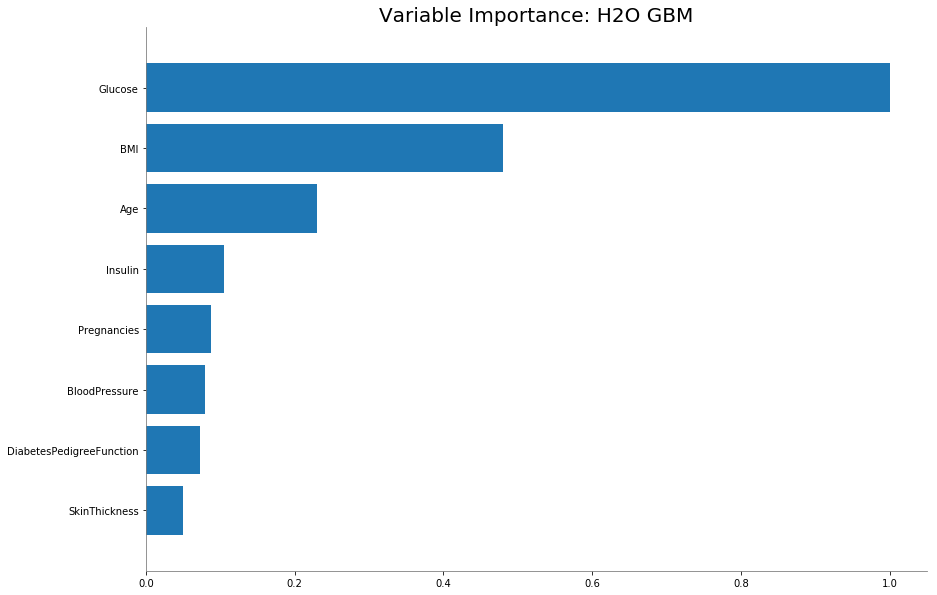

In [22]:
gbm_cv.varimp_plot()

**Let's Try some AutoML stuff**

H2O’s `AutoML` can be used for `automating the machine learning workflow`, which includes `automatic training` and `tuning of many models` within a user-specified time-limit. Stacked Ensembles will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

So let us use the `H2OAutoML` function to do automatic machine learning. We can specify the `max_models` parameter which indicates the number of individual (or "base") models, and does not include the two ensemble models that are trained at the end.

In [23]:
from h2o.automl import H2OAutoML

In [26]:
aml = H2OAutoML(max_models = 10, seed = 100)
aml.train(x = feature_variables, y = response, training_frame = train, validation_frame = val)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [27]:
lb = aml.leaderboard
lb

model_id,auc,logloss
StackedEnsemble_AllModels_0_AutoML_20180813_181226,0.819212,0.494024
StackedEnsemble_BestOfFamily_0_AutoML_20180813_181226,0.819212,0.494024
StackedEnsemble_AllModels_0_AutoML_20180813_181327,0.819191,0.49397
GLM_grid_0_AutoML_20180813_181327_model_0,0.811955,0.501127
GLM_grid_0_AutoML_20180813_181226_model_0,0.811955,0.501127
GBM_grid_0_AutoML_20180813_181327_model_4,0.811786,0.4995
GBM_grid_0_AutoML_20180813_181226_model_4,0.811786,0.4995
GBM_grid_0_AutoML_20180813_181327_model_2,0.786505,0.525103
GBM_grid_0_AutoML_20180813_181226_model_2,0.786505,0.525103
GBM_grid_0_AutoML_20180813_181226_model_0,0.784664,0.54684


In [28]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_0_AutoML_20180813_181226
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1281241628057207
RMSE: 0.35794435713630224
LogLoss: 0.4055300308372596
Null degrees of freedom: 458
Residual degrees of freedom: 454
Null deviance: 588.3909384350488
Residual deviance: 372.2765683086042
AIC: 382.2765683086042
AUC: 0.8932681729711432
Gini: 0.7865363459422865
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2790319122728225: 


,0,1,Error,Rate
0,236.0,67.0,0.2211,(67.0/303.0)
1,20.0,136.0,0.1282,(20.0/156.0)
Total,256.0,203.0,0.1895,(87.0/459.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2790319,0.7576602,196.0
max f2,0.1888358,0.8371041,246.0
max f0point5,0.6630670,0.7661290,81.0
max accuracy,0.3591034,0.8148148,170.0
max precision,0.9150704,1.0,0.0
max recall,0.1096978,1.0,322.0
max specificity,0.9150704,1.0,0.0
max absolute_mcc,0.2790319,0.6205521,196.0
max min_per_class_accuracy,0.3324407,0.8076923,176.0
max mean_per_class_accuracy,0.2790319,0.8253364,196.0


Gains/Lift Table: Avg response rate: 33.99 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0108932,0.8851348,2.9423077,2.9423077,1.0,1.0,0.0320513,0.0320513,194.2307692,194.2307692
,2,0.0217865,0.8731837,2.9423077,2.9423077,1.0,1.0,0.0320513,0.0641026,194.2307692,194.2307692
,3,0.0305011,0.8596565,2.9423077,2.9423077,1.0,1.0,0.0256410,0.0897436,194.2307692,194.2307692
,4,0.0413943,0.8547971,2.9423077,2.9423077,1.0,1.0,0.0320513,0.1217949,194.2307692,194.2307692
,5,0.0501089,0.8446621,2.2067308,2.8143813,0.75,0.9565217,0.0192308,0.1410256,120.6730769,181.4381271
,6,0.1002179,0.7868694,2.6864548,2.7504181,0.9130435,0.9347826,0.1346154,0.2756410,168.6454849,175.0418060
,7,0.1503268,0.7348912,2.5585284,2.6864548,0.8695652,0.9130435,0.1282051,0.4038462,155.8528428,168.6454849
,8,0.2004357,0.6196986,1.9188963,2.4945652,0.6521739,0.8478261,0.0961538,0.5,91.8896321,149.4565217
,9,0.3006536,0.4838111,1.5351171,2.1747492,0.5217391,0.7391304,0.1538462,0.6538462,53.5117057,117.4749164
,10,0.4008715,0.3169329,1.5351171,2.0148411,0.5217391,0.6847826,0.1538462,0.8076923,53.5117057,101.4841137




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.15816240073260845
RMSE: 0.3976963675124635
LogLoss: 0.4754155693116159
Null degrees of freedom: 142
Residual degrees of freedom: 138
Null deviance: 185.16845752761944
Residual deviance: 135.96885282312215
AIC: 145.96885282312215
AUC: 0.8473118279569892
Gini: 0.6946236559139785
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21694837129030067: 


,0,1,Error,Rate
0,66.0,27.0,0.2903,(27.0/93.0)
1,6.0,44.0,0.12,(6.0/50.0)
Total,72.0,71.0,0.2308,(33.0/143.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2169484,0.7272727,70.0
max f2,0.1398948,0.8390411,91.0
max f0point5,0.6602723,0.6962025,26.0
max accuracy,0.6602723,0.7692308,26.0
max precision,0.8826838,1.0,0.0
max recall,0.1263710,1.0,99.0
max specificity,0.8826838,1.0,0.0
max absolute_mcc,0.2169484,0.5624003,70.0
max min_per_class_accuracy,0.2788580,0.7526882,60.0
max mean_per_class_accuracy,0.2169484,0.7948387,70.0


Gains/Lift Table: Avg response rate: 34.97 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0139860,0.8654002,2.8600000,2.8600000,1.0,1.0,0.04,0.04,186.0000000,186.0000000
,2,0.0209790,0.8397535,0.0,1.9066667,0.0,0.6666667,0.0,0.04,-100.0,90.6666667
,3,0.0349650,0.8265332,2.8600000,2.2880000,1.0,0.8,0.04,0.08,186.0000000,128.8
,4,0.0419580,0.8127614,2.8600000,2.3833333,1.0,0.8333333,0.02,0.1,186.0000000,138.3333333
,5,0.0559441,0.8069624,2.8600000,2.5025,1.0,0.875,0.04,0.14,186.0000000,150.25
,6,0.1048951,0.7683849,1.6342857,2.0973333,0.5714286,0.7333333,0.08,0.22,63.4285714,109.7333333
,7,0.1538462,0.7061489,2.4514286,2.21,0.8571429,0.7727273,0.12,0.34,145.1428571,121.0
,8,0.2027972,0.6362214,2.4514286,2.2682759,0.8571429,0.7931034,0.12,0.46,145.1428571,126.8275862
,9,0.3006993,0.4377878,1.2257143,1.9288372,0.4285714,0.6744186,0.12,0.58,22.5714286,92.8837209
,10,0.3986014,0.3275677,1.2257143,1.7561404,0.4285714,0.6140351,0.12,0.7,22.5714286,75.6140351




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.16307639380264152
RMSE: 0.40382718309029364
LogLoss: 0.49402436452422505
Null degrees of freedom: 458
Residual degrees of freedom: 454
Null deviance: 588.6009937909473
Residual deviance: 453.5143666332385
AIC: 463.5143666332385
AUC: 0.8192117288651942
Gini: 0.6384234577303884
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2467748082216652: 


,0,1,Error,Rate
0,209.0,94.0,0.3102,(94.0/303.0)
1,27.0,129.0,0.1731,(27.0/156.0)
Total,236.0,223.0,0.2636,(121.0/459.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2467748,0.6807388,207.0
max f2,0.1640673,0.7868852,263.0
max f0point5,0.6329106,0.6884058,93.0
max accuracy,0.6329106,0.7755991,93.0
max precision,0.8967030,1.0,0.0
max recall,0.0794502,1.0,376.0
max specificity,0.8967030,1.0,0.0
max absolute_mcc,0.3261702,0.4923973,171.0
max min_per_class_accuracy,0.3052172,0.75,178.0
max mean_per_class_accuracy,0.2467748,0.7583460,207.0


Gains/Lift Table: Avg response rate: 33.99 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0108932,0.8790950,2.3538462,2.3538462,0.8,0.8,0.0256410,0.0256410,135.3846154,135.3846154
,2,0.0217865,0.8564306,2.3538462,2.3538462,0.8,0.8,0.0256410,0.0512821,135.3846154,135.3846154
,3,0.0305011,0.8333031,2.2067308,2.3118132,0.75,0.7857143,0.0192308,0.0705128,120.6730769,131.1813187
,4,0.0413943,0.8293527,2.3538462,2.3228745,0.8,0.7894737,0.0256410,0.0961538,135.3846154,132.2874494
,5,0.0501089,0.8133373,2.9423077,2.4306020,1.0,0.8260870,0.0256410,0.1217949,194.2307692,143.0602007
,6,0.1002179,0.7581859,2.3026756,2.3666388,0.7826087,0.8043478,0.1153846,0.2371795,130.2675585,136.6638796
,7,0.1503268,0.6984427,2.3026756,2.3453177,0.7826087,0.7971014,0.1153846,0.3525641,130.2675585,134.5317726
,8,0.2004357,0.6456386,2.0468227,2.2706940,0.6956522,0.7717391,0.1025641,0.4551282,104.6822742,127.0693980
,9,0.3006536,0.4457796,1.0234114,1.8549331,0.3478261,0.6304348,0.1025641,0.5576923,2.3411371,85.4933110
,10,0.4008715,0.3251677,1.7909699,1.8389423,0.6086957,0.625,0.1794872,0.7371795,79.0969900,83.8942308
